Task-2

Reading the data from dataset

a)Read data from “ratings small.csv” with line format: 'userID movieID rating
timestamp'.
b. MAE and RMSE are two famous metrics for evaluating the performances of a
recommender system. The definition of MAE can be found via:
https://en.wikipedia.org/wiki/Mean_absolute_error. The definition of RMSE can
be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation.
c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization
(PMF), User based Collaborative Filtering, Item based Collaborative Filtering,
under the 5-folds cross-validation

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from surprise import SVD, KNNBasic, Reader, Dataset
from surprise import accuracy

data1 = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\Ass_3\ratings_small.csv\ratings_small.csv")
reader1 = Reader(rating_scale=(data1['rating'].min(), data1['rating'].max()))
dataset = Dataset.load_from_df(data1[['userId', 'movieId', 'rating']], reader1)

k = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = {"PMF": [], "UCF": [], "ICF": []}
rmse_scores = {"PMF": [], "UCF": [], "ICF": []}

for train_index, test_index in k.split(data1):
    train_data, test_data = data1.iloc[train_index], data1.iloc[test_index]
    trainset = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader1).build_full_trainset()
    testset = [(uid, iid, rating) for uid, iid, rating in zip(test_data['userId'], test_data['movieId'], test_data['rating'])]

    algo_pmf = SVD()
    algo_pmf.fit(trainset)
    pmf_predictions = [algo_pmf.predict(uid, iid) for uid, iid, _ in testset]
    pmf_predicted_ratings = [pred.est for pred in pmf_predictions]
    true_ratings = [rating for _, _, rating in testset]
    mae_scores["PMF"].append(np.mean(np.abs(np.array(true_ratings) - np.array(pmf_predicted_ratings))))
    rmse_scores["PMF"].append(np.sqrt(np.mean((np.array(true_ratings) - np.array(pmf_predicted_ratings)) ** 2)))

    algo_ucf = KNNBasic(sim_options={'user_based': True})
    algo_ucf.fit(trainset)
    ucf_predictions = [algo_ucf.predict(uid, iid) for uid, iid, _ in testset]
    ucf_predicted_ratings = [pred.est for pred in ucf_predictions]
    mae_scores["UCF"].append(np.mean(np.abs(np.array(true_ratings) - np.array(ucf_predicted_ratings))))
    rmse_scores["UCF"].append(np.sqrt(np.mean((np.array(true_ratings) - np.array(ucf_predicted_ratings)) ** 2)))

    algo_icf = KNNBasic(sim_options={'user_based': False})
    algo_icf.fit(trainset)
    icf_predictions = [algo_icf.predict(uid, iid) for uid, iid, _ in testset]
    icf_predicted_ratings = [pred.est for pred in icf_predictions]
    mae_scores["ICF"].append(np.mean(np.abs(np.array(true_ratings) - np.array(icf_predicted_ratings))))
    rmse_scores["ICF"].append(np.sqrt(np.mean((np.array(true_ratings) - np.array(icf_predicted_ratings)) ** 2)))

print("Average MAE and RMSE across 5 folds:")
for model in ["PMF", "UCF", "ICF"]:
    print(f"{model} - Average MAE: {np.mean(mae_scores[model]):.4f}, Average RMSE: {np.mean(rmse_scores[model]):.4f}")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Average MAE and RMSE across 5 folds:
PMF - Average MAE: 0.6912, Average RMSE: 0.8996
UCF - Average MAE: 0.7437, Average RMSE: 0.9677
ICF - Average MAE: 0.7226, Average RMSE: 0.9362


e)Examine how the cosine, MSD (Mean Squared Difference), and Pearson
similarities impact the performances of User based Collaborative Filtering and
Item based Collaborative Filtering. Plot your results. Is the impact of the three
metrics on User based Collaborative Filtering consistent with the impact of the
three metrics on Item based Collaborative Filtering?

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7456
RMSE: 0.9672
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7306
RMSE: 0.9433
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7456
RMSE: 0.9672
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7306
RMSE: 0.9433
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7456
RMSE: 0.9672
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7306
RMSE: 0.9433


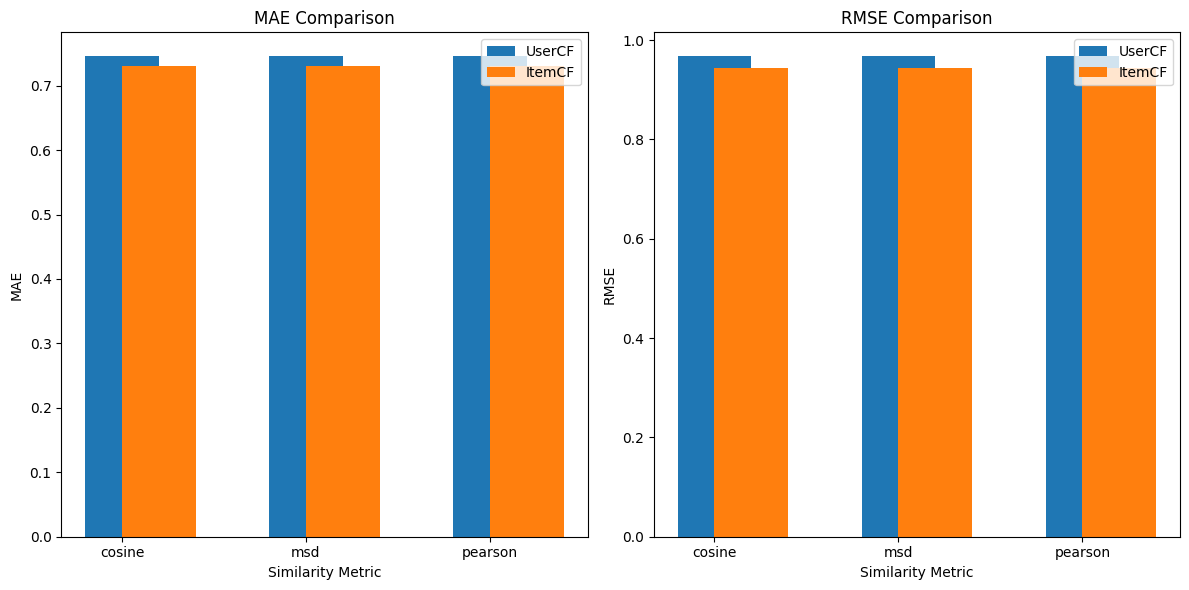

UserCF - MAE Scores: [0.7455556591578778, 0.7455556591578778, 0.7455556591578778]
UserCF - RMSE Scores: [0.9671524784958385, 0.9671524784958385, 0.9671524784958385]
ItemCF - MAE Scores: [0.7305870801107573, 0.7305870801107573, 0.7305870801107573]
ItemCF - RMSE Scores: [0.9433248796999978, 0.9433248796999978, 0.9433248796999978]


In [17]:
import pandas as pd
from surprise import KNNBasic, Reader, Dataset
from surprise import accuracy
import matplotlib.pyplot as plt
from surprise.model_selection import train_test_split

data_path = r"C:\Users\locha\OneDrive\Desktop\Data Mining\Ass_3\ratings_small.csv\ratings_small.csv"
ratings_data = pd.read_csv(data_path)

rating_range = (ratings_data['rating'].min(), ratings_data['rating'].max())
reader = Reader(rating_scale=rating_range)
dataset = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

similarity_types = ['cosine', 'msd', 'pearson']

error_metrics = {'UserCF': {'MAE': [], 'RMSE': []}, 'ItemCF': {'MAE': [], 'RMSE': []}}

for similarity in similarity_types:
    user_cf_model = KNNBasic(sim_options={'user_based': True, 'sim_options': {'name': similarity}})
    user_cf_model.fit(trainset)
    user_cf_preds = user_cf_model.test(testset)
    user_cf_mae = accuracy.mae(user_cf_preds)
    user_cf_rmse = accuracy.rmse(user_cf_preds)
    
    item_cf_model = KNNBasic(sim_options={'user_based': False, 'sim_options': {'name': similarity}})
    item_cf_model.fit(trainset)
    item_cf_preds = item_cf_model.test(testset)
    item_cf_mae = accuracy.mae(item_cf_preds)
    item_cf_rmse = accuracy.rmse(item_cf_preds)
    
    error_metrics['UserCF']['MAE'].append(user_cf_mae)
    error_metrics['UserCF']['RMSE'].append(user_cf_rmse)
    error_metrics['ItemCF']['MAE'].append(item_cf_mae)
    error_metrics['ItemCF']['RMSE'].append(item_cf_rmse)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(similarity_types, error_metrics['UserCF']['MAE'], width=0.4, label='UserCF', align='center')
axes[0].bar(similarity_types, error_metrics['ItemCF']['MAE'], width=0.4, label='ItemCF', align='edge')
axes[0].set_title('MAE Comparison')
axes[0].set_xlabel('Similarity Metric')
axes[0].set_ylabel('MAE')
axes[0].legend()

axes[1].bar(similarity_types, error_metrics['UserCF']['RMSE'], width=0.4, label='UserCF', align='center')
axes[1].bar(similarity_types, error_metrics['ItemCF']['RMSE'], width=0.4, label='ItemCF', align='edge')
axes[1].set_title('RMSE Comparison')
axes[1].set_xlabel('Similarity Metric')
axes[1].set_ylabel('RMSE')
axes[1].legend()

plt.tight_layout()
plt.show()

for model_type in ['UserCF', 'ItemCF']:
    print(f"{model_type} - MAE Scores: {error_metrics[model_type]['MAE']}")
    print(f"{model_type} - RMSE Scores: {error_metrics[model_type]['RMSE']}")



f)Examine how the number of neighbors impacts the performances of User based
Collaborative Filtering and Item based Collaborative Filtering? Plot your results.

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


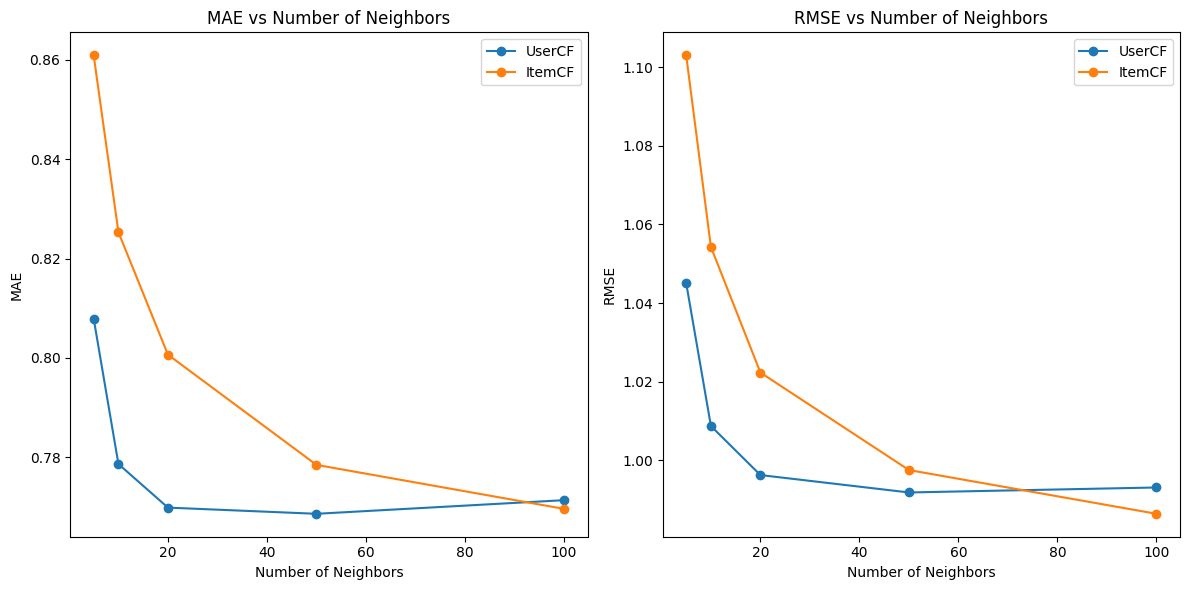

In [18]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

data_path = r"C:\Users\locha\OneDrive\Desktop\Data Mining\Ass_3\ratings_small.csv\ratings_small.csv"
ratings_data = pd.read_csv(data_path)
rating_scale = (ratings_data['rating'].min(), ratings_data['rating'].max())
reader = Reader(rating_scale=rating_scale)
dataset = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

neighbor_counts = [5, 10, 20, 50, 100]

user_cf_results = {'neighbors': [], 'mae': [], 'rmse': []}
item_cf_results = {'neighbors': [], 'mae': [], 'rmse': []}

for neighbor_count in neighbor_counts:
    user_cf_model = KNNBasic(k=neighbor_count, sim_options={'name': 'cosine', 'user_based': True})
    user_cf_model.fit(trainset)
    user_cf_preds = user_cf_model.test(testset)
    user_cf_results['neighbors'].append(neighbor_count)
    user_cf_results['mae'].append(accuracy.mae(user_cf_preds, verbose=False))
    user_cf_results['rmse'].append(accuracy.rmse(user_cf_preds, verbose=False))

    item_cf_model = KNNBasic(k=neighbor_count, sim_options={'name': 'cosine', 'user_based': False})
    item_cf_model.fit(trainset)
    item_cf_preds = item_cf_model.test(testset)
    item_cf_results['neighbors'].append(neighbor_count)
    item_cf_results['mae'].append(accuracy.mae(item_cf_preds, verbose=False))
    item_cf_results['rmse'].append(accuracy.rmse(item_cf_preds, verbose=False))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(user_cf_results['neighbors'], user_cf_results['mae'], label='UserCF', marker='o')
plt.plot(item_cf_results['neighbors'], item_cf_results['mae'], label='ItemCF', marker='o')
plt.title('MAE vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(user_cf_results['neighbors'], user_cf_results['rmse'], label='UserCF', marker='o')
plt.plot(item_cf_results['neighbors'], item_cf_results['rmse'], label='ItemCF', marker='o')
plt.title('RMSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()




g)Identify the best number of neighbor (denoted by K) for User/Item based
collaborative filtering in terms of RMSE. Is the best K of User based collaborative
filtering the same with the best K of Item based collaborative filtering

In [32]:
import pandas as pd
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

movie_data = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\Ass_3\ratings_small.csv\ratings_small.csv")
data_reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(movie_data[['userId', 'movieId', 'rating']], data_reader)
train_data, test_data = train_test_split(surprise_data, test_size=0.2, random_state=42)

def evaluate_knn(K_range, similarity_type, train_data, test_data):
    rmse_results = []
    for k in K_range:
        sim_options = {
            'name': similarity_type,
            'user_based': similarity_type == 'cosine'
        }
        model = KNNBasic(k=k, sim_options=sim_options)
        model.fit(train_data)
        predictions = model.test(test_data)
        rmse_score = accuracy.rmse(predictions)
        rmse_results.append(rmse_score)
    return rmse_results

K_values = [5, 10, 20, 50, 100]
ucf_rmse = evaluate_knn(K_values, 'cosine', train_data, test_data)
icf_rmse = evaluate_knn(K_values, 'pearson', train_data, test_data)

optimal_k_ucf = K_values[ucf_rmse.index(min(ucf_rmse))]
optimal_k_icf = K_values[icf_rmse.index(min(icf_rmse))]

print(f"Best K for User-based CF (UCF): {optimal_k_ucf}")
print(f"Best K for Item-based CF (ICF): {optimal_k_icf}")

if optimal_k_ucf == optimal_k_icf:
    print("The best K for User-based CF is the same as for Item-based CF.")
else:
    print("The best K for User-based CF is different from Item-based CF.")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0443
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0079
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9954
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9909
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9922
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0816
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0374
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0114
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9933
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9864
Best K for User-based CF (UCF): 50
Best K for Item-based CF (ICF): 100
The best K for User-based CF is di

Task1



Q1 and Q2

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize, Binarizer
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from collections import Counter

data = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\kmeans_data\data.csv").to_numpy()
labels = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\kmeans_data\label.csv")
true_labels = labels['7'].to_numpy()

num_clusters = np.unique(true_labels).shape[0]

normalized_data = normalize(data, axis=1)
binary_transformer = Binarizer()
binary_data = binary_transformer.fit_transform(data)

def perform_kmeans_and_metrics(data, true_labels, n_clusters, distance_metric, max_iter=100, seed=42):
    np.random.seed(seed)
    initial_centers = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    centers = initial_centers.copy()

    for _ in range(max_iter):
        dist_matrix = cdist(data, centers, metric=distance_metric)
        cluster_labels = np.argmin(dist_matrix, axis=1)
        new_centers = np.array([data[cluster_labels == i].mean(axis=0) for i in range(n_clusters) if np.any(cluster_labels == i)])
        if np.allclose(centers, new_centers, atol=1e-6):
            break
        centers = new_centers

    predicted_labels = cluster_labels
    cluster_to_label = {}

    for cluster in range(n_clusters):
        cluster_points = true_labels[predicted_labels == cluster]
        if len(cluster_points) > 0:
            majority_label = Counter(cluster_points).most_common(1)[0][0]
            cluster_to_label[cluster] = majority_label

    predicted_mapped_labels = np.array([cluster_to_label[label] for label in predicted_labels])
    accuracy = accuracy_score(true_labels, predicted_mapped_labels)

    dist_matrix = cdist(data, centers, metric=distance_metric)
    sse = np.sum(np.min(dist_matrix, axis=1) ** 2)

    return sse, accuracy

sse_euclidean, accuracy_euclidean = perform_kmeans_and_metrics(normalized_data, true_labels, num_clusters, "euclidean")
sse_cosine, accuracy_cosine = perform_kmeans_and_metrics(normalized_data, true_labels, num_clusters, "cosine")
sse_jaccard, accuracy_jaccard = perform_kmeans_and_metrics(binary_data, true_labels, num_clusters, "jaccard")

print("SSE (Euclidean):", sse_euclidean)
print("SSE (Cosine):", sse_cosine)
print("SSE (Jaccard):", sse_jaccard)
print("Accuracy (Euclidean):", accuracy_euclidean)
print("Accuracy (Cosine):", accuracy_cosine)
print("Accuracy (Jaccard):", accuracy_jaccard)


SSE (Euclidean): 4303.841692352661
SSE (Cosine): 686.7520653442209
SSE (Jaccard): 9999.0
Accuracy (Euclidean): 0.6354635463546354
Accuracy (Cosine): 0.6351635163516351
Accuracy (Jaccard): 0.11351135113511351


Q3)Set up the same stop criteria: “when there is no change in centroid position OR when the
SSE value increases in the next iteration OR when the maximum preset value (e.g., 500, you
can set the preset value by yourself) of iteration is complete”, for Euclidean-K-means, Cosine-K-
means, Jarcard-K-means. Which method requires more iterations and times to converge?

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize, Binarizer
from scipy.spatial.distance import cdist
import time

data = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\kmeans_data\data.csv").to_numpy()
labels = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\kmeans_data\label.csv")
true_labels = labels['7'].to_numpy()

num_clusters = np.unique(true_labels).shape[0]

normalized_data = normalize(data, axis=1)
binary_transformer = Binarizer()
binary_data = binary_transformer.fit_transform(data)

def perform_kmeans_with_stop_criteria(data, true_labels, n_clusters, distance_metric, max_iter=500, seed=42):
    np.random.seed(seed)
    initial_centers = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    centers = initial_centers.copy()
    prev_sse = None
    iteration = 0

    start_time = time.time()

    for _ in range(max_iter):
        dist_matrix = cdist(data, centers, metric=distance_metric)
        cluster_labels = np.argmin(dist_matrix, axis=1)
        new_centers = np.array([data[cluster_labels == i].mean(axis=0) for i in range(n_clusters) if np.any(cluster_labels == i)])

        sse = np.sum(np.min(dist_matrix, axis=1) ** 2)

        if np.allclose(centers, new_centers, atol=1e-6) or (prev_sse is not None and sse > prev_sse):
            break
        
        centers = new_centers
        prev_sse = sse
        iteration += 1

    end_time = time.time()
    convergence_time = end_time - start_time

    return iteration, convergence_time

iter_euclidean, time_euclidean = perform_kmeans_with_stop_criteria(normalized_data, true_labels, num_clusters, "euclidean")
iter_cosine, time_cosine = perform_kmeans_with_stop_criteria(normalized_data, true_labels, num_clusters, "cosine")
iter_jaccard, time_jaccard = perform_kmeans_with_stop_criteria(binary_data, true_labels, num_clusters, "jaccard")

print("Iterations (Euclidean):", iter_euclidean, "Time (seconds):", time_euclidean)
print("Iterations (Cosine):", iter_cosine, "Time (seconds):", time_cosine)
print("Iterations (Jaccard):", iter_jaccard, "Time (seconds):", time_jaccard)


Iterations (Euclidean): 43 Time (seconds): 5.624788522720337
Iterations (Cosine): 17 Time (seconds): 2.4181160926818848
Iterations (Jaccard): 1 Time (seconds): 0.7169570922851562


Q4) Compare the SSEs of Euclidean-K-means Cosine-K-means, Jarcard-K-means with respect to
the following three terminating conditions: (10 points)
• when there is no change in centroid position
• when the SSE value increases in the next iteration
• when the maximum preset value (e.g., 100) of iteration is complete

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize, Binarizer
from scipy.spatial.distance import cdist

data = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\kmeans_data\data.csv").to_numpy()
labels = pd.read_csv(r"C:\Users\locha\OneDrive\Desktop\Data Mining\kmeans_data\label.csv")
true_labels = labels['7'].to_numpy()

num_clusters = np.unique(true_labels).shape[0]

normalized_data = normalize(data, axis=1)
binary_transformer = Binarizer()
binary_data = binary_transformer.fit_transform(data)

def kmeans_with_termination_conditions(data, n_clusters, distance_metric, max_iter=100, stop_criteria="centroid", seed=42):
    np.random.seed(seed)
    initial_centers = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    centers = initial_centers.copy()
    prev_sse = None
    prev_centers = None
    iteration = 0

    for _ in range(max_iter):
        dist_matrix = cdist(data, centers, metric=distance_metric)
        cluster_labels = np.argmin(dist_matrix, axis=1)
        new_centers = np.array([data[cluster_labels == i].mean(axis=0) for i in range(n_clusters) if np.any(cluster_labels == i)])

        sse = np.sum(np.min(dist_matrix, axis=1) ** 2)

        if stop_criteria == "centroid" and np.allclose(centers, new_centers, atol=1e-6):
            break
        elif stop_criteria == "sse_increase" and prev_sse is not None and sse > prev_sse:
            break
        elif stop_criteria == "iteration" and iteration >= max_iter:
            break

        centers = new_centers
        prev_sse = sse
        prev_centers = new_centers
        iteration += 1

    return sse

sse_euclidean_centroid = kmeans_with_termination_conditions(normalized_data, num_clusters, "euclidean", stop_criteria="centroid")
sse_cosine_centroid = kmeans_with_termination_conditions(normalized_data, num_clusters, "cosine", stop_criteria="centroid")
sse_jaccard_centroid = kmeans_with_termination_conditions(binary_data, num_clusters, "jaccard", stop_criteria="centroid")

sse_euclidean_increase = kmeans_with_termination_conditions(normalized_data, num_clusters, "euclidean", stop_criteria="sse_increase")
sse_cosine_increase = kmeans_with_termination_conditions(normalized_data, num_clusters, "cosine", stop_criteria="sse_increase")
sse_jaccard_increase = kmeans_with_termination_conditions(binary_data, num_clusters, "jaccard", stop_criteria="sse_increase")

sse_euclidean_iteration = kmeans_with_termination_conditions(normalized_data, num_clusters, "euclidean", stop_criteria="iteration")
sse_cosine_iteration = kmeans_with_termination_conditions(normalized_data, num_clusters, "cosine", stop_criteria="iteration")
sse_jaccard_iteration = kmeans_with_termination_conditions(binary_data, num_clusters, "jaccard", stop_criteria="iteration")

print("SSE (Euclidean, centroid stop):", sse_euclidean_centroid)
print("SSE (Cosine, centroid stop):", sse_cosine_centroid)
print("SSE (Jaccard, centroid stop):", sse_jaccard_centroid)

print("SSE (Euclidean, SSE increase stop):", sse_euclidean_increase)
print("SSE (Cosine, SSE increase stop):", sse_cosine_increase)
print("SSE (Jaccard, SSE increase stop):", sse_jaccard_increase)

print("SSE (Euclidean, iteration stop):", sse_euclidean_iteration)
print("SSE (Cosine, iteration stop):", sse_cosine_iteration)
print("SSE (Jaccard, iteration stop):", sse_jaccard_iteration)


SSE (Euclidean, centroid stop): 4303.841692352661
SSE (Cosine, centroid stop): 686.7520653442209
SSE (Jaccard, centroid stop): 9999.0
SSE (Euclidean, SSE increase stop): 4303.841692352661
SSE (Cosine, SSE increase stop): 686.6568008216476
SSE (Jaccard, SSE increase stop): 9999.0
SSE (Euclidean, iteration stop): 4303.841692352661
SSE (Cosine, iteration stop): 686.7520653442209
SSE (Jaccard, iteration stop): 9999.0
